In [ ]:
# START SONIC FROM FOLDER
# $cd /Users/NAME/.cargo/registry/src/github.com-1ecc6299db9ec823/sonic-server-1.3.2
# $sonic

## Virtual Documents for Sonic and Vector Search

In [ ]:
import _pickle as pickle
import bz2

dbpedia_dict = pickle.load(bz2.BZ2File('10-2015_DBpedia_12M.pkl.bz2', 'rb'))


In [ ]:
from urllib.parse import urlparse
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# text preprocessing function for the uri | returns virtual document
def URI_processing(URI):
  final = ''
  # getting resource name from IRI
  resource = re.split('#|/',URI)[-1]
  # getting domain name from IRI
  domain = urlparse(URI).netloc
  # remove camelcase from IRI     
  un_camel_list = re.split('(?=[A-Z])', resource) 
  un_camel = ' '.join(un_camel_list).lower() 
  # remove underscores from IRI
  cleaned_resource = un_camel.replace('_',' ').replace('-', ' ')

# TODO document changes : only URI and cleaned resource

  final +=  URI + ' ' + cleaned_resource # data from URI

  return final

def litteral_processing(litteral:str, max_size:int):
  tokens = litteral.split()
  size = len(tokens)
  if size > max_size: litteral = ' '.join(tokens[:max_size])

  #removes special chars
  litteral = re.sub('[^A-Za-z0-9]+', ' ', litteral)
  #removes non ASCII
  litteral = re.sub('[^\x00-\x7F]+', ' ', litteral)
  #removes double spaces
  litteral = re.sub(' +', ' ', litteral)

  return litteral

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philippe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/philippe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lib = dict()
index = dbpedia_dict
max_object_size = 100

for id in index.keys():
  sub = index[id]['subject']
  pred =index[id]['predicate']
  obj = index[id]['object']
  description = ""

  description += URI_processing(sub) + ' ' + URI_processing(pred) + ' ' + litteral_processing(obj, max_object_size )

  lib[id]=description

In [ ]:
lib[0]

'http://dbpedia.org/resource/AccessibleComputing  accessible computing http://www.w3.org/2000/01/rdf-schema#label label AccessibleComputing'

In [ ]:
save_file_pklbz2('library_vdocs_sonic_vec_12M', lib)

In [ ]:
import pickle
import bz2
data = pickle.load(bz2.BZ2File('10-2015_DBpedia_12M.pkl.bz2','rb'))

In [ ]:
# example of turning it into a dataframe from dictionairy
import pandas as pd
df = pd.DataFrame.from_dict(data, orient='index')

In [ ]:
for i in df.keys()[:3]:
    print(i)

subject
predicate
object


In [ ]:
df

,subject,predicate,object
0,http://dbpedia.org/resource/AccessibleComputing,http://www.w3.org/2000/01/rdf-schema#label,AccessibleComputing
1,http://dbpedia.org/resource/AfghanistanHistory,http://www.w3.org/2000/01/rdf-schema#label,AfghanistanHistory
2,http://dbpedia.org/resource/AfghanistanCommuni...,http://www.w3.org/2000/01/rdf-schema#label,AfghanistanCommunications
3,http://dbpedia.org/resource/AfghanistanPeople,http://www.w3.org/2000/01/rdf-schema#label,AfghanistanPeople
4,http://dbpedia.org/resource/AfghanistanTranspo...,http://www.w3.org/2000/01/rdf-schema#label,AfghanistanTransportations
...,...,...,...
11998272,http://dbpedia.org/resource/Star-Mu,http://www.w3.org/2000/01/rdf-schema#comment,"Star-Mu (スタミュ, Sutamyu, or STARMYU), with subt..."
11998273,http://dbpedia.org/resource/Miguel_Lemus,http://www.w3.org/2000/01/rdf-schema#comment,Miguel Lemus (born 26 October 1993) is an Salv...
11998274,http://dbpedia.org/resource/Rommel_Mejía,http://www.w3.org/2000/01/rdf-schema#comment,Rommel Mejía (born 4 February 1994) is an Salv...
11998275,http://dbpedia.org/resource/José_Ángel_Peña,http://www.w3.org/2000/01/rdf-schema#comment,José Peña (born 10 December 1994) is an Salvad...


In [ ]:
queriestest = pickle.load(bz2.BZ2File('eval_queries.pkl.bz2', 'rb'))

-----------------
------------------

## Sonic Search

See Sonic Evaluation Folder

In [1]:
# Load the results for the evaluation
import bz2
import _pickle as pickle
# results with timout 200
sonic_results = pickle.load(bz2.BZ2File('sonic_results_script.pkl.bz2', 'rb'))
eval_queries = pickle.load(bz2.BZ2File('eval_queries.pkl.bz2', 'rb'))

In [2]:
sonic_results

,id,retrieved,query_time,query_time_with_rank_time
0,0,"[<dbpedia:Pastillas>, <dbpedia:Summit_Nutritio...",0.106015,0.214833
1,1,"[<dbpedia:Diet_of_Frankfurt>, <dbpedia:Belle_S...",0.005042,0.033365
2,2,"[<dbpedia:Khalid_bin_Hamad_Al_Thani>, <dbpedia...",0.016784,0.104100
3,3,"[<dbpedia:Second_&_Pike_Tower>, <dbpedia:Captu...",0.011264,0.094794
4,4,"[<dbpedia:Fresh_Patch>, <dbpedia:Anupam_Singh>...",0.033885,0.094318
...,...,...,...,...
462,462,"[<dbpedia:The_Stand-In_(1999_film)>, <dbpedia:...",0.015965,0.077080
463,463,"[<dbpedia:Tovetumab>, <dbpedia:Großadmiral>, <...",0.017270,0.072060
464,464,"[<dbpedia:List_of_Hindu_Nobel_laureates>, <dbp...",0.016120,0.074787
465,465,"[<dbpedia:Noel_Murphy_(comedian)>, <dbpedia:Th...",0.026594,0.125830


In [17]:
#  average query time
from scipy import stats
import numpy as np
querytimes = sonic_results['query_time']
ranked_querytimes = sonic_results['query_time_with_rank_time']
mean_query_time = np.mean(querytimes)
median_query_time = np.median(querytimes)
mode_query_time = stats.mode(round(querytimes, 4))
print(f'Mean query times: {round(mean_query_time, 4)} seconds\nMedian query times: {round(median_query_time, 4)} seconds\nMode query times when query times rounded to 4 decimal: {str(mode_query_time.mode)} appeared {str(mode_query_time.count)} times')

ranked_mean_query_time = np.mean(ranked_querytimes)
ranked_median_query_time = np.median(ranked_querytimes)
ranked_mode_query_time = stats.mode(round(ranked_querytimes, 4))
print(f'Mean query times ranked: {round(ranked_mean_query_time, 4)} seconds\nMedian query times: {round(ranked_median_query_time, 4)} seconds\nMode query times when query times rounded to 4 decimal: {str(ranked_mode_query_time.mode)} appeared {str(ranked_mode_query_time.count)} times')

Mean query times: 0.0198 seconds
Median query times: 0.0176 seconds
Mode query times when query times rounded to 4 decimal: [0.0192] appeared [6] times
Mean query times ranked: 0.0892 seconds
Median query times: 0.0849 seconds
Mode query times when query times rounded to 4 decimal: [0.0468] appeared [6] times


In [8]:
display(querytimes.nlargest(10), querytimes.nsmallest(10))

0      0.106015
15     0.062131
85     0.059990
58     0.059576
269    0.058475
170    0.056677
157    0.055729
228    0.054224
261    0.051368
192    0.050397
Name: query_time, dtype: float64

7      0.001622
402    0.002475
334    0.002513
9      0.002779
345    0.003854
343    0.004089
360    0.004274
309    0.004489
367    0.004599
365    0.004634
Name: query_time, dtype: float64

In [18]:
display(ranked_querytimes.nlargest(10), ranked_querytimes.nsmallest(10))

269    0.242190
261    0.220488
157    0.219983
201    0.218725
170    0.218419
0      0.214833
216    0.206754
228    0.205346
205    0.204147
162    0.203550
Name: query_time_with_rank_time, dtype: float64

334    0.015386
402    0.015615
345    0.017549
7      0.018199
343    0.019038
365    0.027696
301    0.029370
360    0.029650
11     0.029698
364    0.029864
Name: query_time_with_rank_time, dtype: float64

Text(0.5, 0, 'Query Time (seconds)')

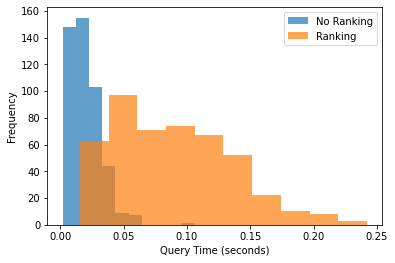

In [15]:
import matplotlib.pyplot as plt
# frequency of query times
sonic_results['query_time'].plot.hist(alpha=0.7, label='No Ranking');
sonic_results['query_time_with_rank_time'].plot.hist(alpha=0.7, label='Ranking');
plt.legend()
plt.xlabel('Query Time (seconds)')


In [19]:
# all needed data for evaluation
ids = sonic_results['id']
evaluated_queries = [eval_queries['query'][id] for id in ids]
relevant_entities = [eval_queries['relevant_entities'][id] for id in ids]
very_relevant_entities = [eval_queries['very_relevant_entities'][id] for id in ids]
retrieved_entities = sonic_results['retrieved']

In [20]:
len_eval_queries = [len(query.split()) for query in evaluated_queries]

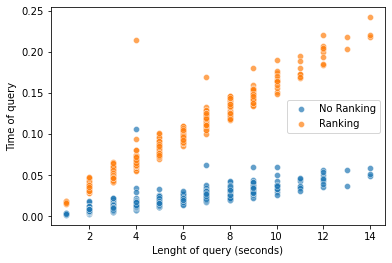

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

# plot query time with query lenghts
sns.scatterplot(y =querytimes, x = len_eval_queries, label='No Ranking', alpha=0.7);
# plot query time with query lenghts
sns.scatterplot(y =ranked_querytimes, x = len_eval_queries, label='Ranking', alpha=0.7);
plt.xlabel('Lenght of query (seconds)');
plt.ylabel('Time of query');
plt.legend()
plt.show()

### Precision Recall @n

In [28]:
assesed_retrieved_precision_recall = []
len_relevants = []
assesed_retrieved_nDCG = []

for retrievedentities, relevantentities, veryrelevantentities in zip(retrieved_entities, relevant_entities, very_relevant_entities):
    assesed_precision_recall = []
    assesed_nDCG = []

    for entity in retrievedentities:
        if entity in relevantentities:
            assesed_precision_recall.append(1)
            assesed_nDCG.append(1)

        if entity in veryrelevantentities:
            assesed_precision_recall.append(1)
            assesed_nDCG.append(2)

        else:
            assesed_precision_recall.append(0)
            assesed_nDCG.append(0)
    
    len_relevants.append(len(relevantentities) + len(veryrelevantentities))

    assesed_retrieved_precision_recall.append(assesed_precision_recall)
    assesed_retrieved_nDCG.append(assesed_nDCG)

In [29]:
# precision at n micro macro average
import numpy as np

def micro_macro_precision_recall_at_n(binary_assement_list:list, number_of_relevant_entities:list, n):
    total_relevant = 0
    total_number_retrieved = 0
    precision_scores = []
    recall_scores = []

    for scores, number_relevant in zip(binary_assement_list, number_of_relevant_entities):
        if len(scores) < n :
            continue
        scores = scores[:n]
        relevant = sum(scores)
        number_retrieved = len(scores)
        precision = relevant/number_retrieved
        recall = relevant/number_relevant


        precision_scores.append(precision)
        recall_scores.append(recall)
        total_relevant += relevant
        total_number_retrieved += number_retrieved

    micro_average_precision = total_relevant/total_number_retrieved
    macro_average_precision = np.mean(precision_scores)

    micro_average_recall = total_relevant/sum(number_of_relevant_entities)
    macro_average_recall = np.mean(recall_scores)

    return micro_average_precision, macro_average_precision, micro_average_recall, macro_average_recall

# PLOT PRECISION AT N RECALL AT N Take the scores over the length of the scores

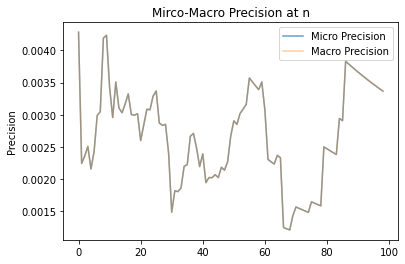

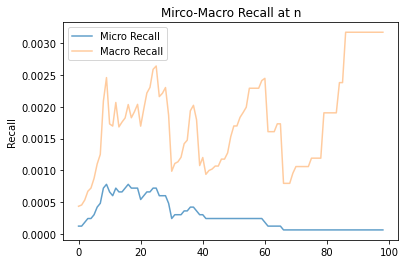

In [30]:
import matplotlib.pyplot as plt
micro_p = []
macro_p = []
micro_r = []
macro_r = []

for n in range(1, 100):
    micro_average_precision, macro_average_precision, micro_average_recall, macro_average_recall = micro_macro_precision_recall_at_n(assesed_retrieved_precision_recall, len_relevants, n)
    micro_p.append(micro_average_precision)
    macro_p.append(macro_average_precision)
    micro_r.append(micro_average_recall)
    macro_r.append(macro_average_recall)

plt.plot(micro_p, alpha=0.7, label='Micro Precision');
plt.title('Mirco-Macro Precision at n')
plt.ylabel('Precision')
plt.plot(macro_p, alpha=0.4, label='Macro Precision');
plt.legend()
# plt.title('Marco Precision at n')
# plt.ylabel('Precision')
plt.show();
plt.plot(micro_r, alpha=0.7, label='Micro Recall');
plt.title('Mirco-Macro Recall at n')
plt.ylabel('Recall')
plt.plot(macro_r, alpha=0.4, label='Macro Recall');
plt.legend()


In [31]:
total_relevant = 0
total_number_retrieved = 0
precision_scores = []
recall_scores = []

for id, (scores, number_relevant) in enumerate(zip(assesed_retrieved_precision_recall, len_relevants)):
    relevant = sum(scores)
    number_retrieved = len(scores)
    precision = relevant/number_retrieved
    recall = relevant/number_relevant


    precision_scores.append(precision)
    recall_scores.append(recall)
    total_relevant += relevant
    total_number_retrieved += number_retrieved

micro_average_precision = total_relevant/total_number_retrieved
macro_average_precision = np.mean(precision_scores)

micro_average_recall = total_relevant/sum(len_relevants)
macro_average_recall = np.mean(recall_scores)

print(f'The Global Precision:\nMicro Average: {micro_average_precision}\nMacro Average: {macro_average_precision}\n')
print(f'The Global Recall:\nMicro Average: {micro_average_recall}\nMacro Average: {macro_average_recall}')

The Global Precision:
Micro Average: 0.003027681660899654
Macro Average: 0.002658651294119593

The Global Recall:
Micro Average: 0.0016766467065868263
Macro Average: 0.0025600610102565957


### DCG, iDCG, nDCG @n

In [32]:
import numpy as np

def dcg_idcg_ndcg(retrieved_relevance_DCG_scores:list, n:int):
    # Relevance scores in Ideal order
    sorted_relevace = sorted(retrieved_relevance_DCG_scores[:n], reverse=True)
    # Relevance scores in output order
    relevance_score = retrieved_relevance_DCG_scores[:n]

    def discountedCumulativeGain(result):
        dcg = []
        for idx, val in enumerate(result): 
            numerator = 2**val - 1
            # add 2 because python 0-index
            denominator =  np.log2(idx + 2) 
            score = numerator/denominator
            dcg.append(score)
        return sum(dcg)

    def normalizedDiscountedCumulativeGain(result, sorted_result): 
        dcg = discountedCumulativeGain(result)
        idcg = discountedCumulativeGain(sorted_result)
        ndcg = dcg / idcg
        return ndcg

    
    return discountedCumulativeGain(relevance_score), discountedCumulativeGain(sorted_relevace), normalizedDiscountedCumulativeGain(relevance_score, sorted_relevace)

In [33]:
import numpy as np

mean_dcg_at_n, mean_idcg_at_n, mean_ndcg_at_n, mean_skipped_at_n = [], [], [], []

for n in range(1, 100):
    dcg_at_n, idcg_at_n, ndcg_at_n, skipped = [], [], [], 0
    
    for scores in assesed_retrieved_nDCG:
        if len(scores)< n:
            skipped += 1
            continue
        dcg, ideal_dcg, ndcg  = dcg_idcg_ndcg(scores, n)[0], dcg_idcg_ndcg(scores, n)[1], dcg_idcg_ndcg(scores, n)[2]
        dcg_at_n.append(dcg)
        idcg_at_n.append(ideal_dcg)
        ndcg_at_n.append(ndcg)


    mean_dcg_at_n.append(np.mean(dcg_at_n))
    mean_idcg_at_n.append(np.mean(dcg_at_n))
    mean_ndcg_at_n.append(np.mean(dcg_at_n))
    mean_skipped_at_n.append(skipped/len(assesed_retrieved_nDCG)*100)

    

/var/folders/wt/zc3p8xys6pzdscmtyvwvlrkc0000gn/T/ipykernel_74605/473647459.py:22: RuntimeWarning: invalid value encountered in double_scalars
  ndcg = dcg / idcg


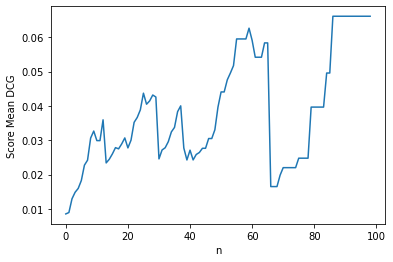

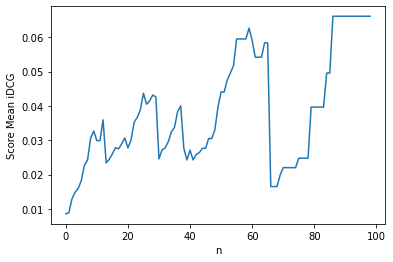

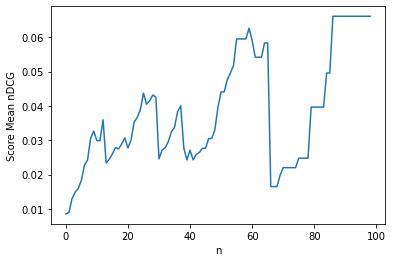

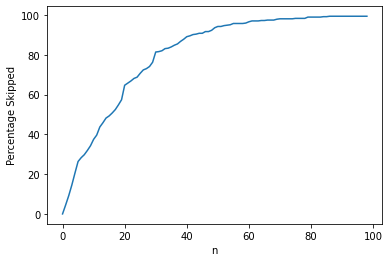

In [34]:
import matplotlib.pyplot as plt

plt.plot(mean_dcg_at_n)
plt.ylabel('Score Mean DCG')
plt.xlabel('n')
plt.show()
plt.plot(mean_idcg_at_n)
plt.ylabel('Score Mean iDCG')
plt.xlabel('n')
plt.show()
plt.plot(mean_ndcg_at_n)
plt.ylabel('Score Mean nDCG')
plt.xlabel('n')
plt.show()
plt.plot(mean_skipped_at_n)
plt.ylabel('Percentage Skipped')
plt.xlabel('n')
plt.show()


/var/folders/wt/zc3p8xys6pzdscmtyvwvlrkc0000gn/T/ipykernel_74605/473647459.py:22: RuntimeWarning: invalid value encountered in double_scalars
  ndcg = dcg / idcg


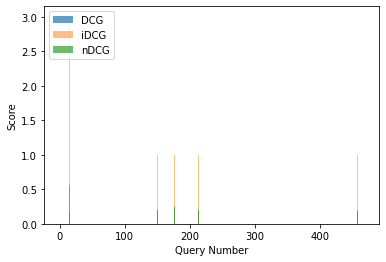

In [35]:
n = 40
dcg_at_n, idcg_at_n, ndcg_at_n = [], [], []
show_dense = False

for i in assesed_retrieved_nDCG:
    scores = i[:n]
    if (len(scores)< n) and show_dense: continue
    if len(scores)< n:
        dcg_at_n.append(0)
        idcg_at_n.append(0)
        ndcg_at_n.append(0)
        continue
    dcg, ideal_dcg, ndcg  = dcg_idcg_ndcg(scores, n)[0], dcg_idcg_ndcg(scores, n)[1], dcg_idcg_ndcg(scores, n)[2]
    dcg_at_n.append(dcg)
    idcg_at_n.append(ideal_dcg)
    ndcg_at_n.append(ndcg)

plt.bar(range(len(dcg_at_n)), dcg_at_n, label='DCG', alpha=0.7)
plt.bar(range(len(idcg_at_n)),idcg_at_n, label="iDCG", alpha=0.5)
plt.bar(range(len(ndcg_at_n)),ndcg_at_n, label='nDCG', alpha=0.7)
plt.ylabel('Score')
plt.xlabel('Query Number')
plt.legend()
plt.show()